In [14]:
import numpy as np
import pandas as pd
import os
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

from IPython.display import Image
from sklearn.metrics import confusion_matrix
from reporting_functions import (
    confusion_matrix_stats,
    plot_confusion_matrix_nn,
    get_tp_tn_lists,
    plot_loss,
    get_result_table,
    gather_experiment_results,
    gather_results_deprecated,
    get_file_content,
    get_result_table_target_pairs,
    get_multiclass_results,
)

from circuit_presets import (
    filter_embedding_options,
    EMBEDDING_OPTIONS,
    CIRCUIT_OPTIONS,
    POOLING_OPTIONS,
)
# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [15]:
experiments_path = "../experiments"
experiment_filename = "experiment_config.json"  # "experiment.txt"
experiment_time = "experiment_time.json"

In [26]:
experiment_id = 61 # 54 # 61 # 64 
experiment_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)
experiment_time_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_time}"
)
result_data = gather_experiment_results(f"{experiments_path}/{experiment_id}")

In [27]:
experiment_info

{'ID': 61,
 'path': '../experiments',
 'data': {'target_pairs': [['blues', 'classical'],
   ['blues', 'country'],
   ['blues', 'disco'],
   ['blues', 'hiphop'],
   ['blues', 'jazz'],
   ['blues', 'metal'],
   ['blues', 'pop'],
   ['blues', 'reggae'],
   ['blues', 'rock'],
   ['classical', 'country'],
   ['classical', 'disco'],
   ['classical', 'hiphop'],
   ['classical', 'jazz'],
   ['classical', 'metal'],
   ['classical', 'pop'],
   ['classical', 'reggae'],
   ['classical', 'rock'],
   ['country', 'disco'],
   ['country', 'hiphop'],
   ['country', 'jazz'],
   ['country', 'metal'],
   ['country', 'pop'],
   ['country', 'reggae'],
   ['country', 'rock'],
   ['disco', 'hiphop'],
   ['disco', 'jazz'],
   ['disco', 'metal'],
   ['disco', 'pop'],
   ['disco', 'reggae'],
   ['disco', 'rock'],
   ['hiphop', 'jazz'],
   ['hiphop', 'metal'],
   ['hiphop', 'pop'],
   ['hiphop', 'reggae'],
   ['hiphop', 'rock'],
   ['jazz', 'metal'],
   ['jazz', 'pop'],
   ['jazz', 'reggae'],
   ['jazz', 'rock'],

In [28]:
experiment_time_info

{'pca-8-quantum-Angle-U_5-blues-classical': 489.6766254901886,
 'pca-8-quantum-Angle-U_5-blues-country': 494.8090844154358,
 'pca-8-quantum-Angle-U_5-blues-disco': 635.9113612174988,
 'pca-8-quantum-Angle-U_5-blues-hiphop': 599.946231842041,
 'pca-8-quantum-Angle-U_5-blues-jazz': 727.0919344425201,
 'pca-8-quantum-Angle-U_5-blues-metal': 762.3178174495697,
 'pca-8-quantum-Angle-U_5-blues-pop': 760.627542257309,
 'pca-8-quantum-Angle-U_5-blues-reggae': 741.3081772327423,
 'pca-8-quantum-Angle-U_5-blues-rock': 743.6159455776215,
 'pca-8-quantum-Angle-U_5-classical-country': 738.8888189792633,
 'pca-8-quantum-Angle-U_5-classical-disco': 741.0591549873352,
 'pca-8-quantum-Angle-U_5-classical-hiphop': 741.1628277301788,
 'pca-8-quantum-Angle-U_5-classical-jazz': 729.2342035770416,
 'pca-8-quantum-Angle-U_5-classical-metal': 569.1434233188629,
 'pca-8-quantum-Angle-U_5-classical-pop': 583.7563078403473,
 'pca-8-quantum-Angle-U_5-classical-reggae': 563.5089204311371,
 'pca-8-quantum-Angle-U_5

In [29]:
result_data.head()

,model,circuit,circuit_param_count,reduction_method,reduction_size,embedding_option,embedding_class,embedding_permutation,target_levels_list,target_levels,accuracy,precision,recall,f1,loss_train_history,loss_test_history,y_hat,y_test
0,pca-8-quantum-Angle-U_5-blues-classical,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, classical]",blues-classical,0.933,0.886,1.000,0.939,0 16.662 1 19.108 2 16.109 3 1...,0 17.327 1 15.774 2 15.740 3 1...,0 0 1 0 2 1 3 0 4 1 ....,0 0 1 0 2 1 3 0 4 1 ....
1,pca-8-quantum-Angle-U_5-blues-country,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, country]",blues-country,0.679,0.636,0.778,0.700,0 16.558 1 19.685 2 19.390 3 1...,0 17.367 1 18.491 2 19.814 3 1...,0 0 1 0 2 1 3 0 4 1 ....,0 1 1 1 2 1 3 1 4 0 ....
2,pca-8-quantum-Angle-U_5-blues-disco,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, disco]",blues-disco,0.738,0.674,0.969,0.795,0 19.868 1 20.887 2 21.182 3 1...,0 18.860 1 17.863 2 19.169 3 1...,0 0 1 0 2 1 3 0 4 1 ....,0 1 1 0 2 1 3 1 4 1 ....
3,pca-8-quantum-Angle-U_5-blues-hiphop,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, hiphop]",blues-hiphop,0.949,0.966,0.933,0.949,0 20.092 1 17.970 2 18.866 3 1...,0 17.231 1 17.830 2 18.671 3 2...,0 0 1 0 2 0 3 0 4 0 ....,0 0 1 0 2 0 3 0 4 0 ....
4,pca-8-quantum-Angle-U_5-blues-jazz,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, jazz]",blues-jazz,0.898,0.833,1.000,0.909,0 20.856 1 18.921 2 18.722 3 1...,0 19.084 1 18.122 2 17.829 3 1...,0 0 1 0 2 1 3 0 4 0 ....,0 0 1 0 2 1 3 0 4 0 ....


In [30]:
result_data.shape

(45, 18)

In [31]:
confusion_table, confusion_metrics = get_multiclass_results(experiments_path, experiment_info, "pca-8-quantum-Angle-U_5")

In [32]:
confusion_table

,jazz,rock,classical,hiphop,reggae,metal,blues,disco,country,pop
jazz,15,2,6,0,0,0,1,4,2,0
rock,4,6,0,0,1,6,1,5,7,1
classical,0,0,30,0,0,0,0,0,1,0
hiphop,0,0,0,11,2,2,0,1,2,12
reggae,1,2,1,4,11,1,1,2,5,6
metal,0,1,0,1,0,23,0,0,0,0
blues,5,2,0,0,4,6,5,4,3,0
disco,1,2,0,3,0,6,0,16,2,2
country,0,4,1,0,0,2,2,8,10,0
pop,1,0,1,0,1,0,1,2,1,24


In [33]:
print(confusion_metrics)

              precision    recall  f1-score   support

        jazz       0.45      0.17      0.25        29
        rock       0.77      0.97      0.86        31
   classical       0.30      0.37      0.33        27
      hiphop       0.38      0.50      0.43        32
      reggae       0.58      0.37      0.45        30
       metal       0.56      0.50      0.53        30
       blues       0.50      0.92      0.65        25
       disco       0.53      0.77      0.63        31
     country       0.58      0.32      0.42        34
         pop       0.32      0.19      0.24        31

    accuracy                           0.50       300
   macro avg       0.50      0.51      0.48       300
weighted avg       0.50      0.50      0.48       300



In [34]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

,jazz,rock,classical,hiphop,reggae,metal,blues,disco,country,pop,Average
jazz,NaN,0.787,0.885,0.967,0.891,0.982,0.898,0.903,0.825,0.951,0.899
rock,0.787,NaN,0.968,0.852,0.785,0.839,0.683,0.794,0.603,0.935,0.805
classical,0.885,0.968,NaN,1.0,0.954,1.0,0.933,0.984,0.948,0.984,0.962
hiphop,0.967,0.852,1.0,NaN,0.703,0.836,0.949,0.823,0.93,0.689,0.861
reggae,0.891,0.785,0.954,0.703,NaN,0.949,0.825,0.727,0.754,0.815,0.823
metal,0.982,0.839,1.0,0.836,0.949,NaN,0.796,0.842,0.885,0.946,0.897
blues,0.898,0.683,0.933,0.949,0.825,0.796,NaN,0.738,0.679,1.0,0.834
disco,0.903,0.794,0.984,0.823,0.727,0.842,0.738,NaN,0.746,0.889,0.827
country,0.825,0.603,0.948,0.93,0.754,0.885,0.679,0.746,NaN,0.845,0.802
pop,0.951,0.935,0.984,0.689,0.815,0.946,1.0,0.889,0.845,NaN,0.895


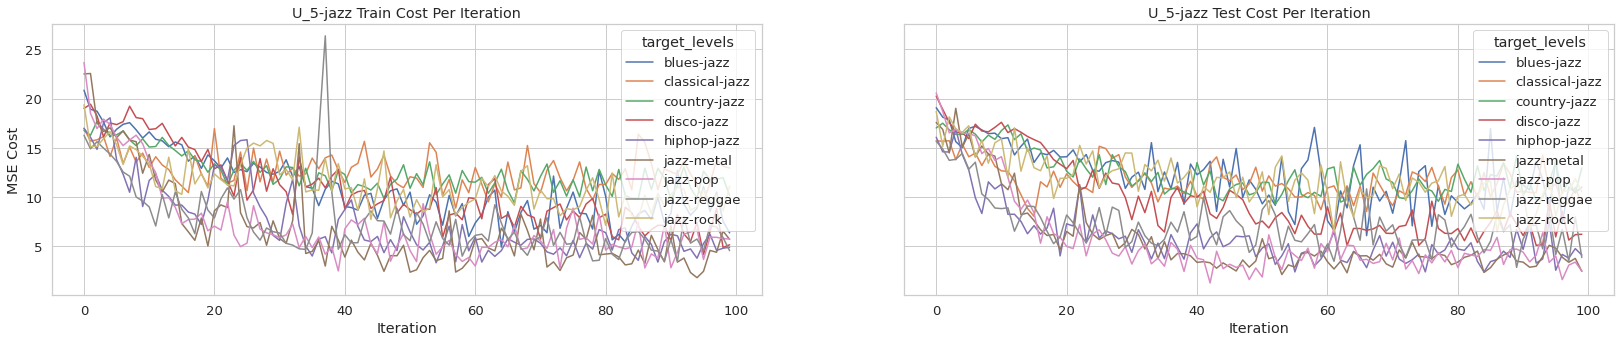

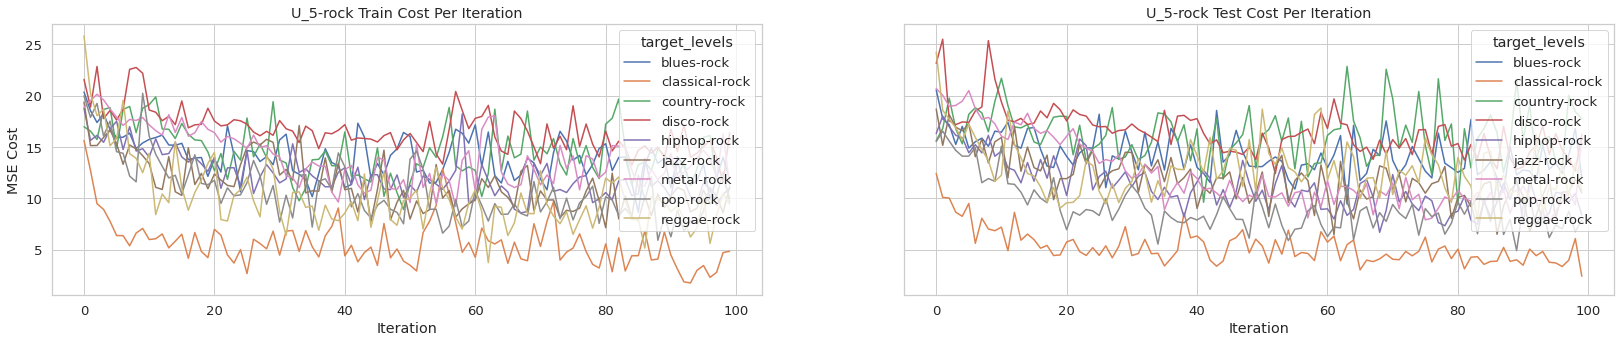

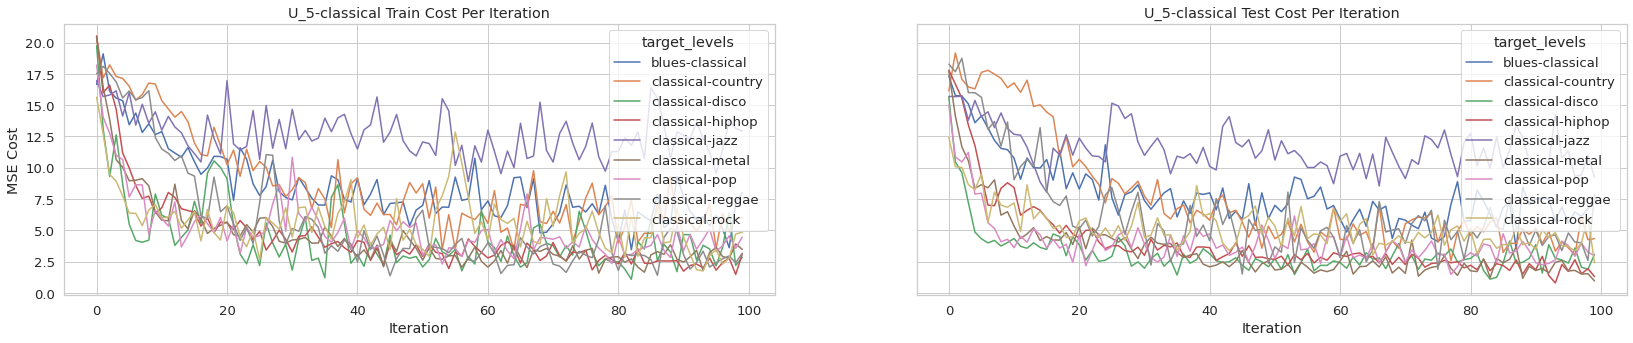

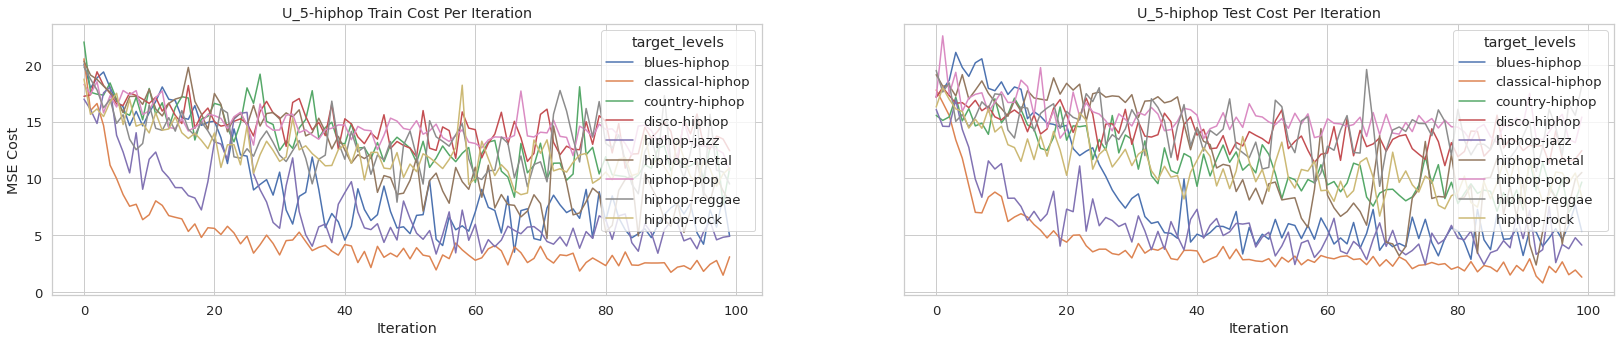

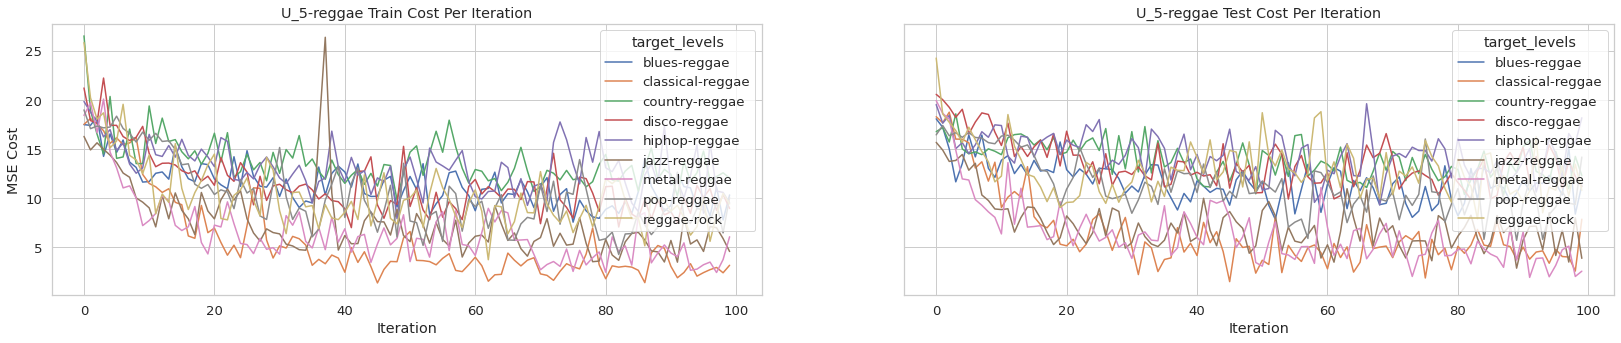

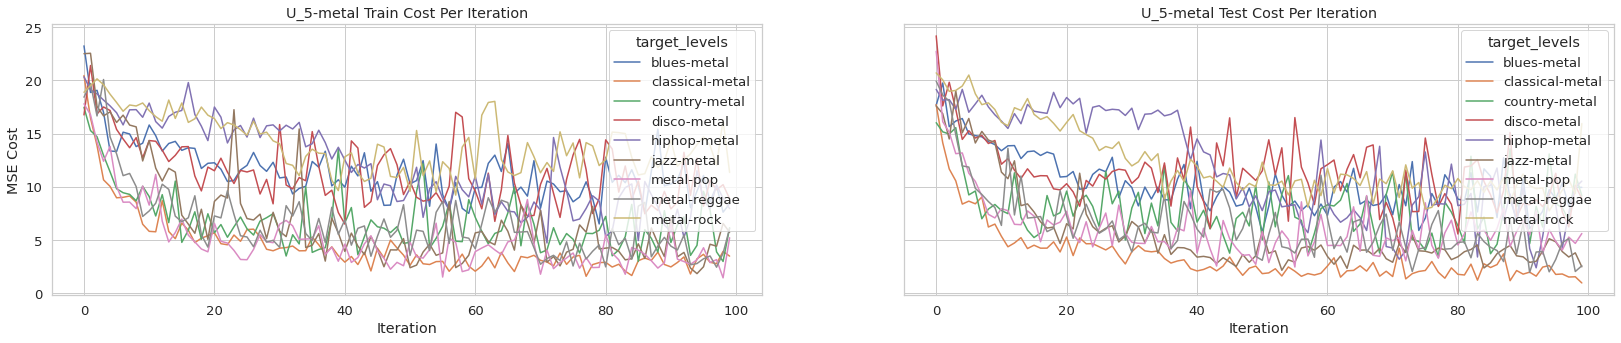

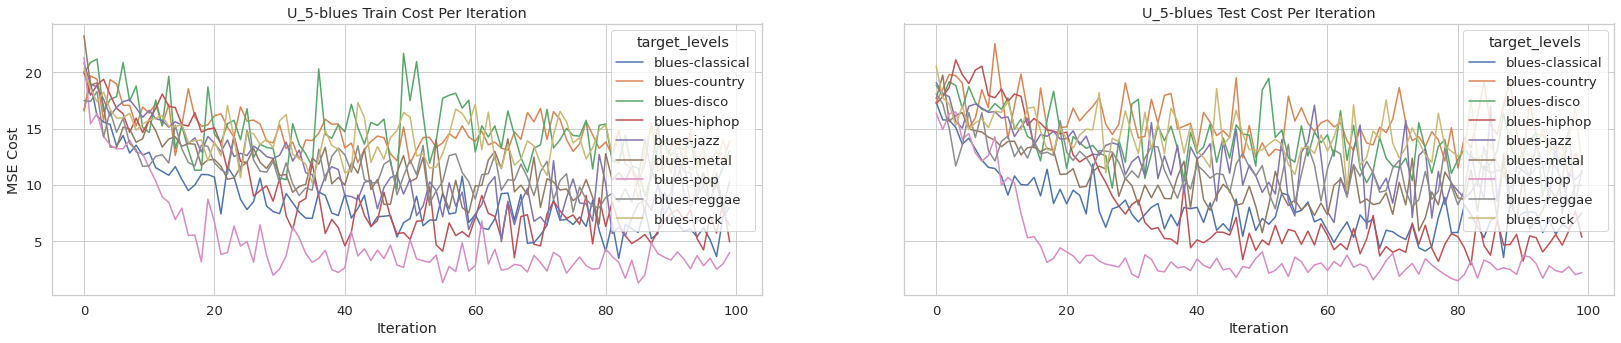

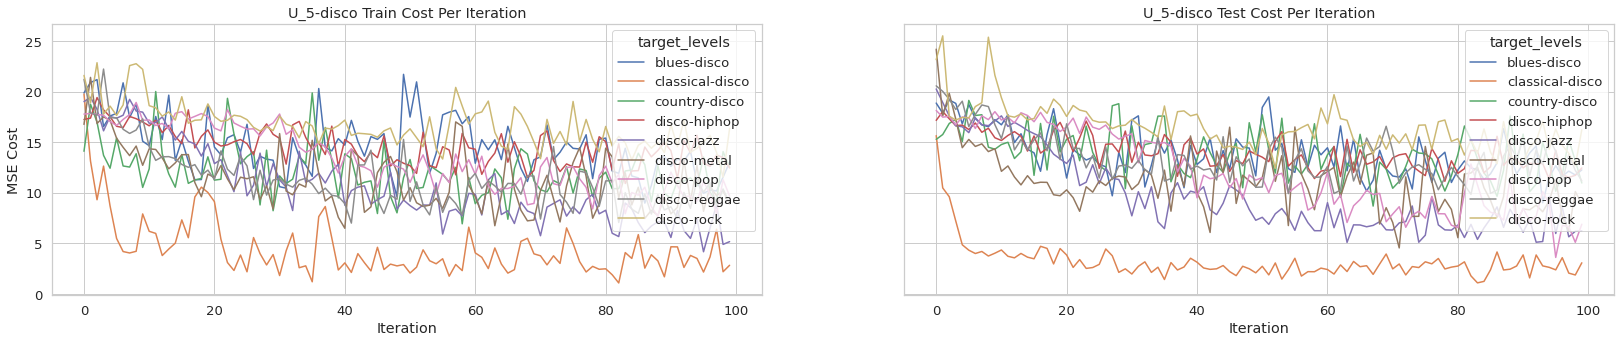

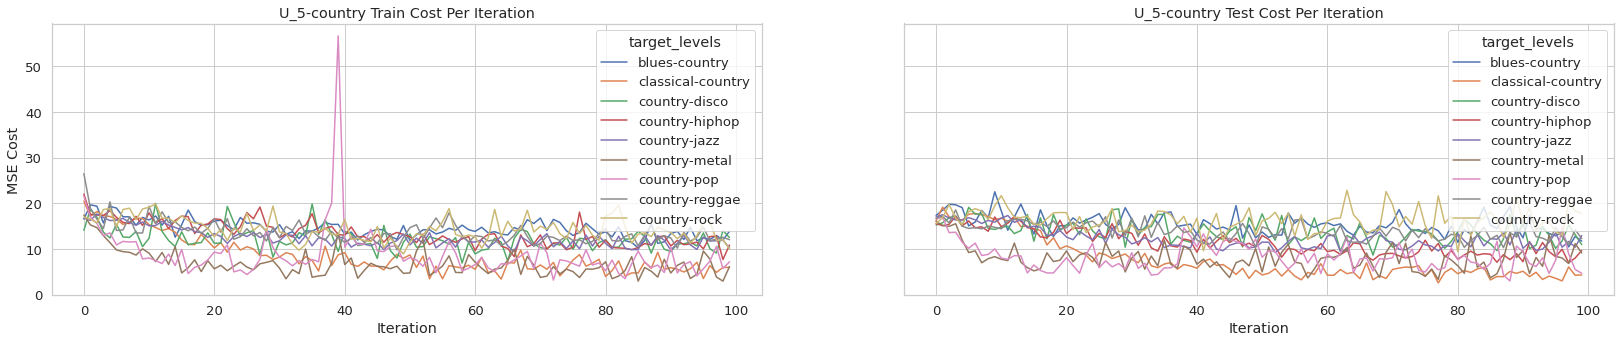

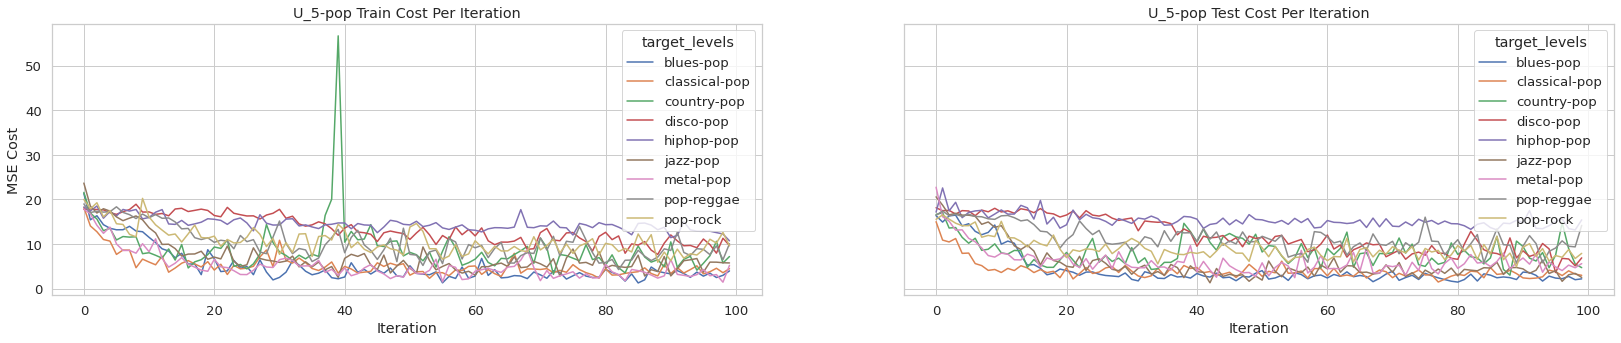

In [35]:
distinct_levels = list(
    {item for combo in experiment_info["data"]["target_pairs"] for item in combo}
)
for level in distinct_levels:
    plot_loss(result_data, "circuit", "target_levels", [f"{level}"], figsize=(28, 5))